# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics, ensemble
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize

# Redefine Accuracy Function

In [2]:
def acc(tol,label,pred):
    correct=list()
    for i in range(len(label)):
        t=(abs(label[i]-pred[i])<=tol)
        correct.append(t)
    c=np.array(correct).astype('int')
    return np.mean(correct)

# Import the data

In [3]:
data_train = pd.read_csv('./train_set.csv',encoding='gb18030')
data_test = pd.read_csv('./test_set.csv',encoding='gb18030')
np.random.seed(11)
X_train = data_train.iloc[:, 2:14].fillna(0).astype(float)
y_train = data_train.iloc[:, 0].fillna(0).astype(int)
X_test = data_test.iloc[:, 2:14].fillna(0).astype(float)
y_test = data_test.iloc[:, 0].fillna(0).astype(int)

# Model formulation

depth =  10 min_sample =  3
Test set accuracy:  0.699438202247191
Train set accuracy:  0.7869198312236287
depth =  10 min_sample =  5
Test set accuracy:  0.702247191011236
Train set accuracy:  0.7721518987341772
depth =  10 min_sample =  7
Test set accuracy:  0.7162921348314607
Train set accuracy:  0.7658227848101266
depth =  15 min_sample =  3
Test set accuracy:  0.651685393258427
Train set accuracy:  0.8220815752461322
depth =  15 min_sample =  5
Test set accuracy:  0.6601123595505618
Train set accuracy:  0.7883263009845288
depth =  15 min_sample =  7
Test set accuracy:  0.6741573033707865
Train set accuracy:  0.7721518987341772
depth =  20 min_sample =  3
Test set accuracy:  0.6432584269662921
Train set accuracy:  0.8248945147679325
depth =  20 min_sample =  5
Test set accuracy:  0.6573033707865169
Train set accuracy:  0.7911392405063291
depth =  20 min_sample =  7
Test set accuracy:  0.6741573033707865
Train set accuracy:  0.7749648382559775
test confusion matrix
 [[ 0  0  0  0  0 

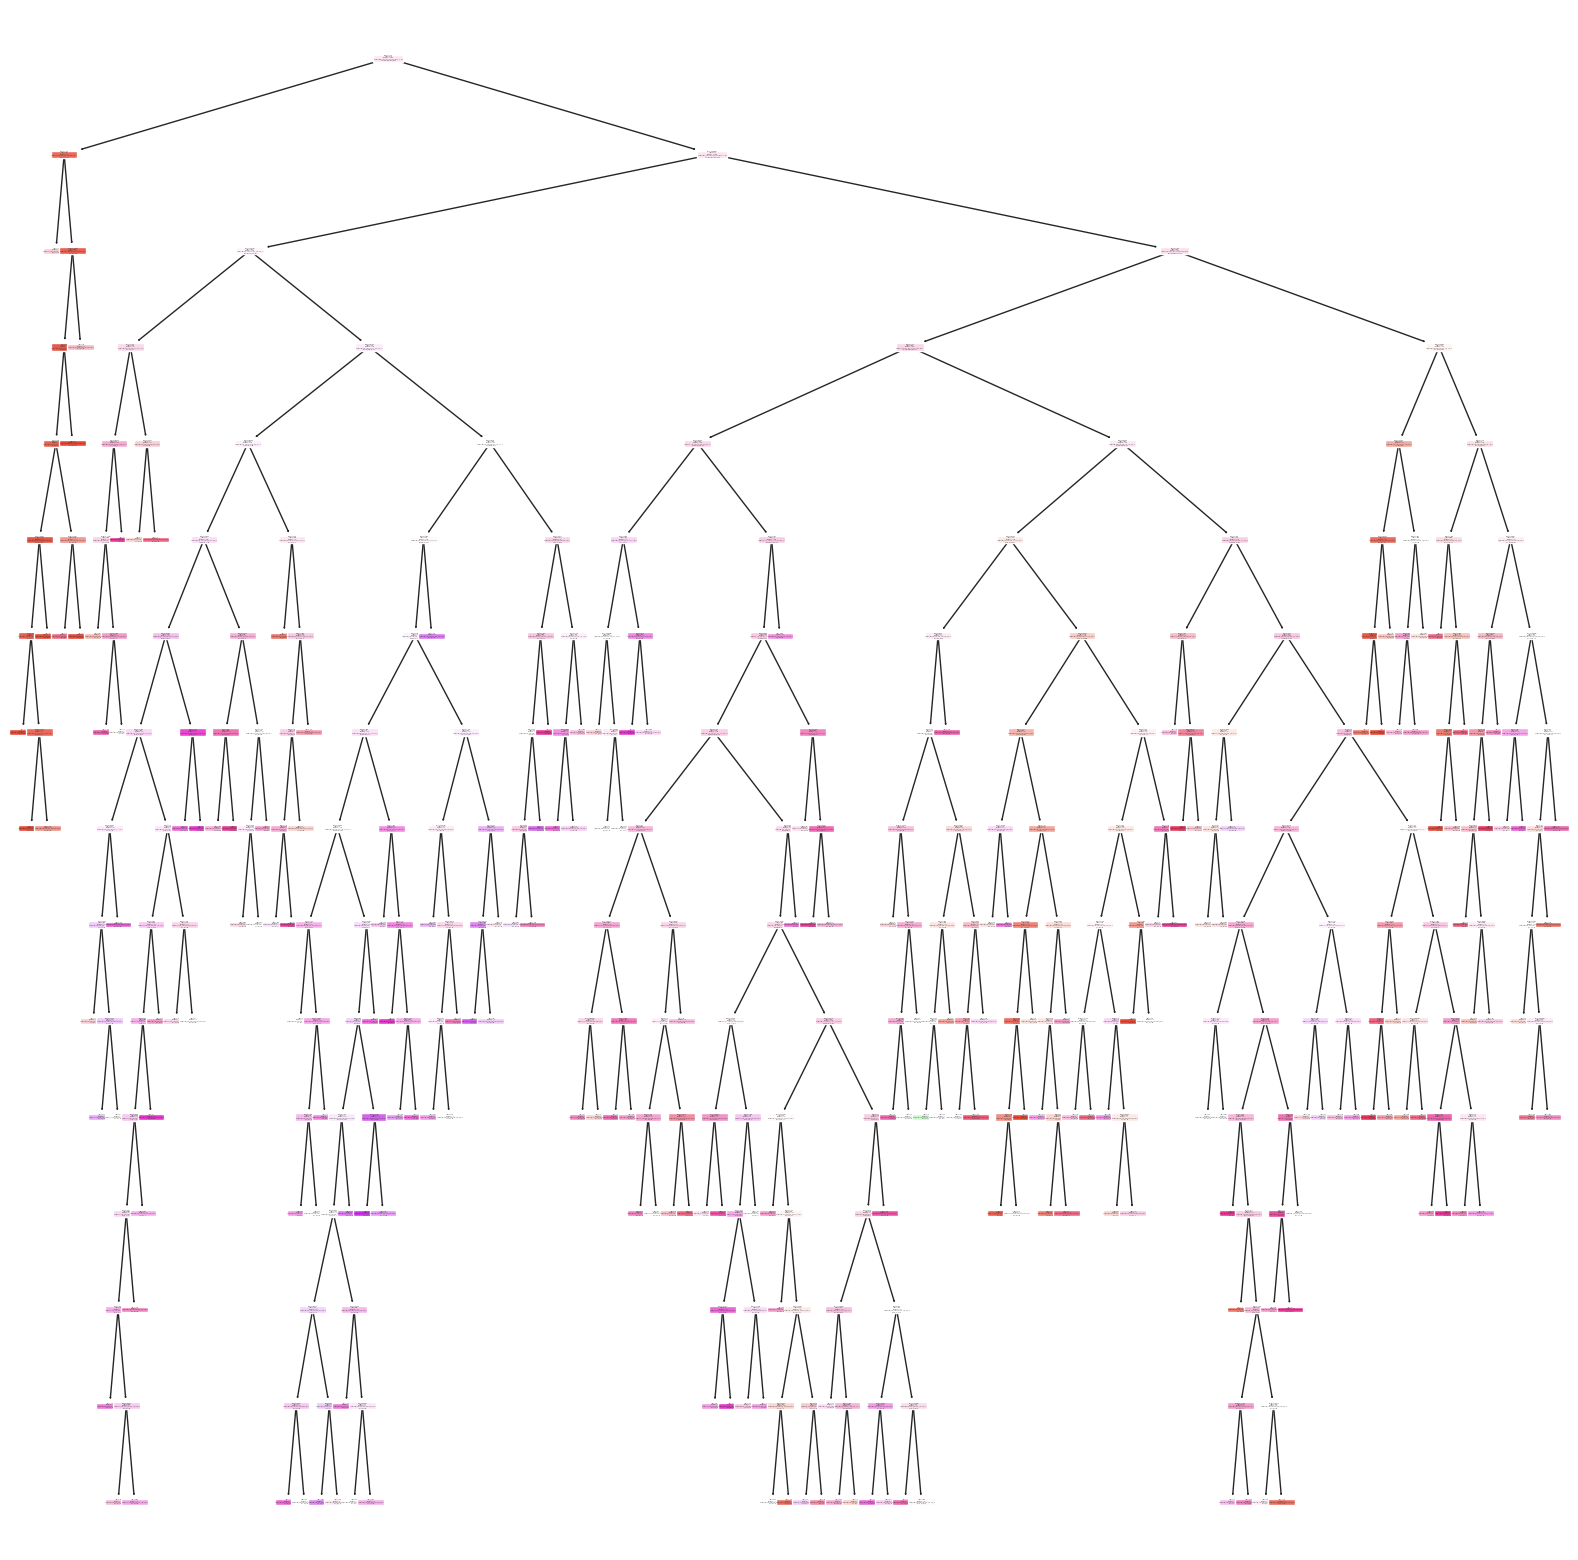

In [4]:
# set the hyperparameter for the base models

depths = [10,15,20]
min_samples = [3,5,7]
for tree_depth in depths:
    for min_sample in min_samples:
        accuracy_dtree = []
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=tree_depth, min_samples_leaf=min_sample)
        dtree.fit(X_train, y_train)
        print('depth = ',tree_depth,'min_sample = ', min_sample)
        y_pred_dt = dtree.predict(X_test)
        print('Test set accuracy: ', acc(1,y_test,y_pred_dt))
        y_pred_dt = dtree.predict(X_train)
        print('Train set accuracy: ', acc(1,y_train,y_pred_dt))
#综合test accuracy和train accuracy,选择tree_depth=15,min_sample = 5

tree_depth=15
min_sample = 5
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=tree_depth, min_samples_leaf=min_sample)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
y_test_label = label_binarize(y_test, classes=[1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print('test confusion matrix\n',metrics.confusion_matrix(y_test,y_pred_dt))

tree_depth=15
min_sample = 5
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=tree_depth, min_samples_leaf=min_sample)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
plt.figure(figsize=(20, 20))
tree.plot_tree(dtree, filled=True)
plt.show()